In [1]:
using Pkg

In [29]:
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("MLJ")
Pkg.add("NearestNeighborModels")

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [31c24e10] + Distributions v0.25.80
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [30]:
using Random, Distributions
using Plots
using DelimitedFiles
using LinearAlgebra
using MLJ
using DataFrames

### Problem 1
Write a short (2-3 sentence) description of any opinions, thoughts, or questions you are left with after reading Breiman (2001) and one of the responses to it.

1. I am not completely sure what the difference is between "data" and "algorithmic" modelling. Is the difference between parametric and non-parametric models? Is there not some continuum between the two extremes?
2. Breiman makes the argument that the ultimate goal is for the model box to emulate nature's box, yet the examples he gives are all prediction problems, where prediction accuracy is more valuable than understanding the underlying process. However, while making accurate predictions using data is important in some contexts, if it is possible to understand the underlying process, we are in a better position to generalize and extend our predictions to contexts where there may be limited or no data yet. 

### Problem 2
Pick a figure from ESL chapter 2 and write R, Python, or Julia code to replicate it. 

*Reproducing Figure 2.1 from ESLII*

Simulating the data according to Section 2.3.3

1. Generate 10 means $\mu_k$ from a bivariate Gaussian distribution $\mathcal{N}((1,0)^T,\mathbf{I})$ for the blue class, and 10 more from $\mathcal{N}((0,1)^T,\mathbf{I})$ for the orange class.
1. For each class, generate 100 observations. For each observation, pick a $m_k$ at random with probability $1/10$, and then genrate a $\mathcal{N}(m_k, \mathbf{I}/5)$

In [72]:
Random.seed!(123)

d1 = Normal(1, 1)
d2 = Normal(0, 1)

blue_means = hcat(rand(d1, 10), rand(d2, 10))
orange_means = hcat(rand(d2, 10), rand(d1, 10))
        
means_dist = Categorical(0.1*ones(10))
        
blue_sample_means = blue_means[rand(means_dist, 100),:]
orange_sample_means = orange_means[rand(means_dist, 100),:]

blue_samples = zeros((100, 2))
orange_samples = zeros((100,2))

for i in 1:100
    d1 = Normal(blue_sample_means[i,1], 0.2)
    d2 = Normal(blue_sample_means[i,2], 0.2)
    blue_samples[i,1] = rand(d1,1)[1]
    blue_samples[i,2] = rand(d2,1)[1]
    
    d1 = Normal(orange_sample_means[i,1], 0.2)
    d2 = Normal(orange_sample_means[i,2], 0.2)
    orange_samples[i,1] = rand(d1,1)[1]
    orange_samples[i,2] = rand(d2,1)[1]
end

First, I want to see where the means (large circles) and sample points (small circles) are relative to each other:

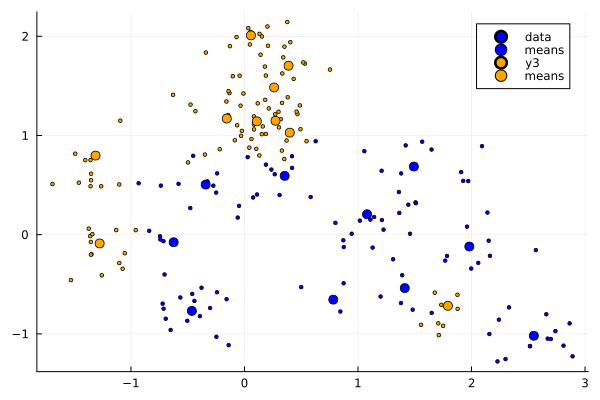

In [86]:
plot(blue_samples[:,1], blue_samples[:,2], seriestype=:scatter,mc="blue", ms=2, label="data")
plot!(blue_means[:,1],blue_means[:,2],seriestype=:scatter,mc="blue", ms=5, label="means")
plot!(orange_samples[:,1], orange_samples[:,2], sexriestype=:scatter, mc="orange", ms=2)
plot!(orange_means[:,1],orange_means[:,2],seriestype=:scatter,mc="orange", ms=5, label="means")
x = -2:0.1:3
plot!(x, )

Linear regression:

In [150]:
samples = vcat(blue_samples, orange_samples)
samples_with_bias = hcat(samples, ones(200))
labels = vcat(zeros(100), ones(100))
        
weights = samples_with_bias\labels

3-element Vector{Float64}:
 -0.1280283698066083
  0.2743234356645293
  0.44026059824209973

Plotting grid points:

In [154]:
grid = zeros((0,3))

for x1 in -2:0.1:3
    for x2 in -1.2:0.1:2.2
        grid = vcat(grid, [x1 x2 [x1, x2, 1]'weights])
    end
end

orange_grid = grid[grid[:,3].> 0.5, :]
blue_grid = grid[grid[:,3].<= 0.5, :]

867×3 Matrix{Float64}:
 -2.0  -1.2  0.367129
 -2.0  -1.1  0.394562
 -2.0  -1.0  0.421994
 -2.0  -0.9  0.449426
 -2.0  -0.8  0.476859
 -1.9  -1.2  0.354326
 -1.9  -1.1  0.381759
 -1.9  -1.0  0.409191
 -1.9  -0.9  0.436623
 -1.9  -0.8  0.464056
 -1.9  -0.7  0.491488
 -1.8  -1.2  0.341524
 -1.8  -1.1  0.368956
  ⋮          
  3.0   0.5  0.193337
  3.0   0.6  0.22077
  3.0   0.7  0.248202
  3.0   0.8  0.275634
  3.0   0.9  0.303067
  3.0   1.0  0.330499
  3.0   1.1  0.357931
  3.0   1.2  0.385364
  3.0   1.3  0.412796
  3.0   1.4  0.440228
  3.0   1.5  0.467661
  3.0   1.6  0.495093

Plotting the decision boundary (used reference: https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/):

With $Y=0.5$ as the decision boundary, the decision boundary is given by $ax + by + c = 0.5$ where $a =$ `weights[1]`, $b =$ `weights[2]`, and $c =$ `weights[3]`. To visualize it, we need to convert it to the form $y = mx + d$. 

Plugging in $x=0$ gives $y=d$ in the second equation, and $by + d = 0.5$ from the first equation, therefore $c=\frac{0.5-d}{b}$. To get the slope of the decision boundary, suppose two points $(x_1, y_1)$ and $(x_2,y_2)$ lie on the decision boundary such that $x_2-x_1>0$ and $y_2-y_1>0$. We have $ax_2+by_2 - (ax_1+b_1) = 0$. Rearranging gives $\frac{y_2-y_1}{x_2-x_1} = -\frac{a}{b}$, which is the slope. 

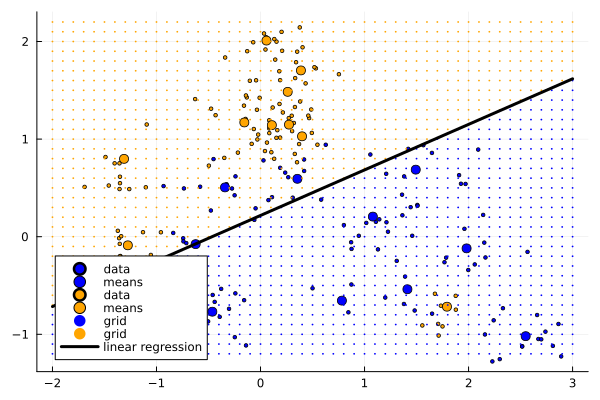

In [157]:
plot(blue_samples[:,1], blue_samples[:,2], seriestype=:scatter,mc="blue", ms=2, label="data")
plot!(blue_means[:,1],blue_means[:,2],seriestype=:scatter,mc="blue", ms=5, label="means")
plot!(orange_samples[:,1], orange_samples[:,2], seriestype=:scatter, mc="orange", ms=2, label="data")
plot!(orange_means[:,1],orange_means[:,2],seriestype=:scatter,mc="orange", ms=5, label="means")

plot!(blue_grid[:,1], blue_grid[:,2], seriestype=:scatter, mc="blue", ms=1, label="grid", markerstrokewidth=0)
plot!(orange_grid[:,1], orange_grid[:,2], seriestype=:scatter, mc="orange", ms=1, label="grid", markerstrokewidth=0)

x = -2:0.1:3
plot!(x, -weights[1]/weights[2].*x.+((0.5-weights[3])/weights[2]), w=3, linecolor="black", label="linear regression")

### Problem 3
Suppose we use the *mean absolute error* instead of the mean squared error:

$$\text{MAE}(m) = \mathbb{E}[\lvert Y-m\rvert]$$

Is this also minimized by taking $m=\mathbb{E}[Y]$? If not, what value of $\tilde{\mu}$ minimizes the MAE? Should we use MSE or MAE to measure error?

It can be seen from an example of 3 points on $[0,L]$ with the first point on $0$ and the third point on $L$. $\mathbb{E}[Y]$ is larger than $\frac{L}{3}$ except in the special case where the second point is at $\frac{L}{2}$. The geometric median is defined as the point which minimizes the sum of distances to the sample points, and therefore minimizes the MAE. 

The MAE is more robust than the MSE as it is more sensitive to outliers, however, the MSE is differentiable and has nicer mathematical properties, so may be more suitable for simple applications. 

### Problem 4
Consider the global mean as a linear smoother. Work out the influence matrix $\mathbf{w}$, and show that it has one degree of freedom, using the definition in Eq. 1.70.

In the case of the global mean, the weights $\hat{w}(x_i,x)$ in the estimate of the regression function 

$$\hat{\mu}(x) = \sum_i y_i \hat{w}(x_i,x)$$

are uniformly $1/n$, where $n$ is the number of data points. The trace of the $\mathbf{w}$ matxis is therefore $n\frac{1}{n}=1$.

### Problem 5
Consider $k$-nearest-neighbors regression as a linear smoother. Work out the influence matrix $\mathbf{w}$, and find an expression for the number of degrees of freedom (in the sense of Eq.1.70) in terms of $k$ and $n$. Hint: Your answers should reduce to those of the previous problem when $k = n$.

For $k$-mearest-neighbours regression, each row in the influence matrix $\mathbb{w}$ is $0$ except for $k$ entries corresponding to the nearest neighbours, which are $1/k$ each. $\hat{w}(x_i,x_i)$ is always $1/k$ as each point must be a nearest neighbour to itself. The trace of $\mathbf{w}$ is therefore $\frac{n}{k}$.  

### Problem 6
Compare the classification performance of linear regression and $k$–nearest neighbor classification on the zipcode data. In particular, consider only the 2’s and 3’s, and $k = 1, 3, 5, 7 $ and $15$. Show both the training and test error for each choice.

In [4]:
## Read in training data (format is in rows of 217 numbers, where the first number is the label 0-9, and the remaining 256 numbers indicate the pixel intensity)
training_data = readdlm("zip.train")
training_data_y = convert(Vector{Int8}, training_data[:,1])
training_data[:,1] .= 1; #create column of ones for intercept

In [91]:
## Filter for '2' and '3'. 
A = training_data[2 .<= training_data_y .<= 3,:]
b = training_data_y[2 .<= training_data_y .<= 3]

## compute least squares coefficients
x = A\b

## compute training data
train_predictions = round.(Int8, A * x)
lr_train_error = sum(train_predictions .!= b)/length(b)
print("Training error for linear regression: ", lr_train_error)

Training error for linear regression: 0.005759539236861051

In [6]:
test_data = readdlm("zip.test")
test_data_y = convert(Vector{Int8}, test_data[:,1])
test_data[:,1] .= 1 # insert column of 1s for intercept

test_data = test_data[2 .<= test_data_y .<= 3,:]
test_data_y = test_data_y[2 .<= test_data_y .<= 3]

test_predictions = round.(Int8, test_data * x)
lr_test_error = sum(test_predictions .!= test_data_y)/length(test_data_y)
print("Test error for linear regression: ", lr_test_error)

Test error for linear regression: 0.04120879120879121

For $k$-nearest-neighbours in Julia, I referenced the implementation in https://plotly.com/julia/knn-classification/ and the MLJ docs: https://alan-turing-institute.github.io/MLJ.jl/v0.5/

In [27]:
KNNClassifier = @load KNNClassifier verbosity=0

train_data = A[:,2:end] # remove the column of 1s that had been inserted earlier for linear regression
train_data = DataFrame(train_data, :auto) # MLJ expects an input of type Table
train_labels = categorical(b) # MLJ interprets integer arrays as counts, need to convert to a categorical data type

test_data = readdlm("zip.test")
test_data_y = convert(Vector{Int8}, test_data[:,1])

test_data = test_data[2 .<= test_data_y .<= 3,:]
test_data_y = test_data_y[2 .<= test_data_y .<= 3]

test_data = test_data[:,2:end] # remove the column of 1s that had been inserted earlier for linear regression
test_data = DataFrame(test_data, :auto)
test_labels = categorical(test_data_y)

for k in [1, 3, 5, 7]
    clf = KNNClassifier(K=k)

    mach = machine(clf, train_data, train_labels)
    fit!(mach)
    yhat_train = predict_mode(mach, train_data)
    yhat_test = predict_mode(mach, test_data)

    train_comparison = yhat_train .== train_labels
    train_error = 1 - sum(train_comparison)/length(train_comparison)
    
    test_comparison = yhat_test .== test_labels
    test_error = 1- sum(test_comparison)/length(test_comparison)
    
    println("k=", k, ", Training error: ", train_error)
    println("k=", k, ", Test error: ", test_error)
end

[ Info: Training machine(KNNClassifier(K = 1, …), …).


k=1, Training error: 0.0
k=1, Test error: 0.02472527472527475


[ Info: Training machine(KNNClassifier(K = 3, …), …).


k=3, Training error: 0.005039596832253412
k=3, Test error: 0.030219780219780223


[ Info: Training machine(KNNClassifier(K = 5, …), …).


k=5, Training error: 0.005759539236861011
k=5, Test error: 0.030219780219780223


[ Info: Training machine(KNNClassifier(K = 7, …), …).


k=7, Training error: 0.006479481641468721
k=7, Test error: 0.03296703296703296
